In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
spark = SparkSession.builder \
    .appName("Sales Data Analysis") \
    .getOrCreate()

df_spark = spark.read.csv("Sales-Data-Analysis.csv", header=True, inferSchema=True)

In [18]:
string_cols = [field.name for field in df_spark.schema.fields if field.dataType.simpleString() == 'string']

for c in string_cols:
    df_spark = df_spark.withColumn(c, trim(col(c)))

df_spark = df_spark.withColumn("Price", col("Price").cast("float"))
df_spark = df_spark.withColumn("Quantity", col("Quantity").cast("float"))
df_spark = df_spark.withColumn("TotalSale", col("Price") * col("Quantity"))
df_pd = df_spark.toPandas()

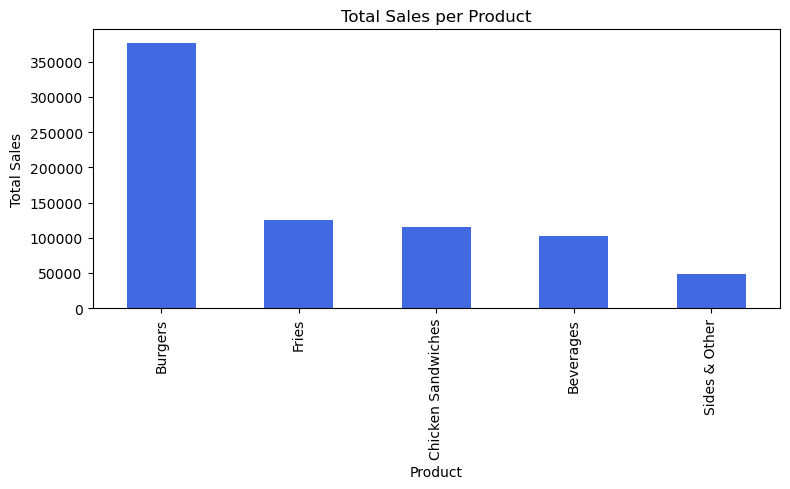

In [19]:
product_sales = df_pd.groupby('Product')['TotalSale'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
product_sales.plot(kind='bar', color='royalblue')
plt.title('Total Sales per Product')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

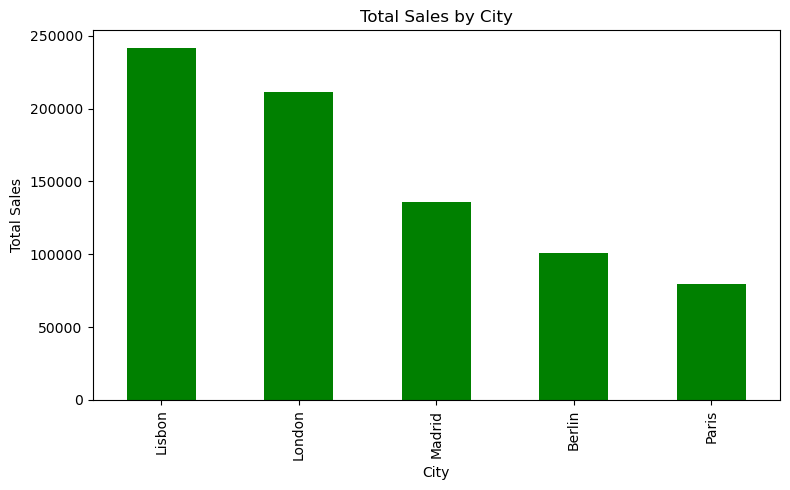

In [20]:
city_sales = df_pd.groupby('City')['TotalSale'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
city_sales.plot(kind='bar', color='green')
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.tight_layout()
plt.show()

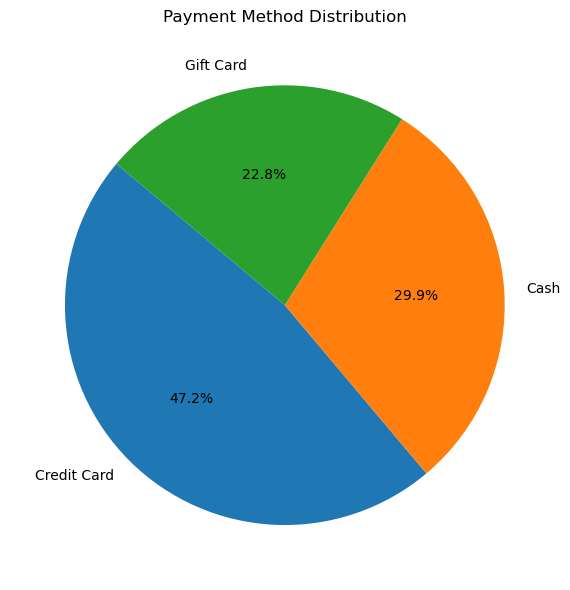

In [21]:
payment_counts = df_pd['Payment Method'].value_counts()
plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

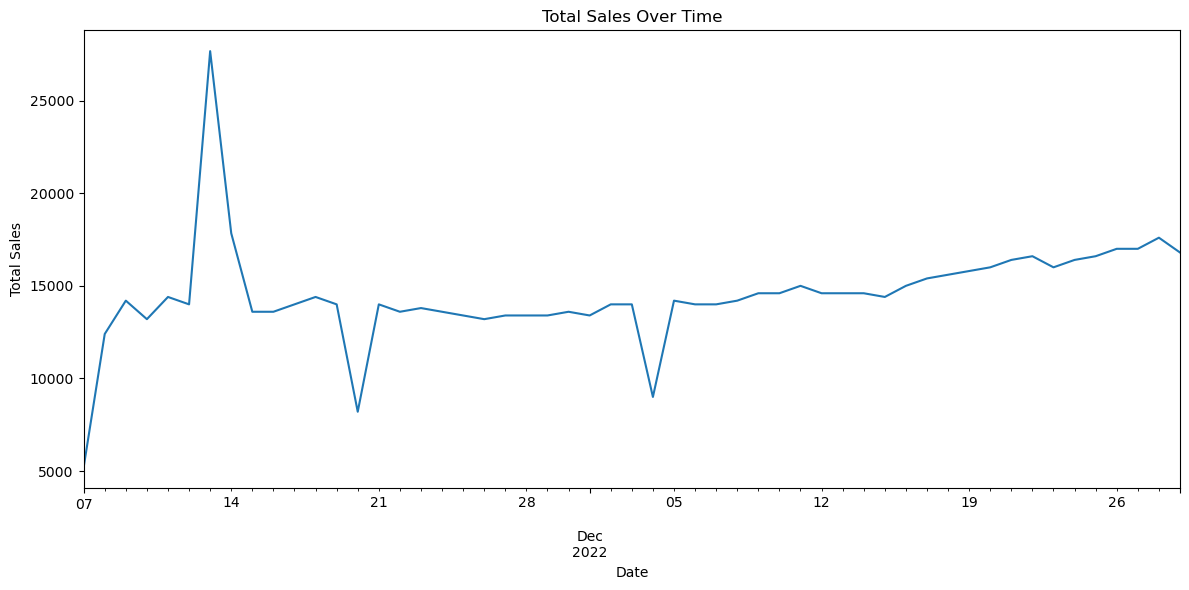

In [22]:
df_pd['Date'] = pd.to_datetime(df_pd['Date'], dayfirst=True)
daily_sales = df_pd.groupby('Date')['TotalSale'].sum()
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()